In [1]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
trump_df = pd.read_csv("../data/trump-rallies/combined.csv")

In [3]:
trump_df.head()

,name,text,time,rally
0,Donald Trump,"I want to thank you very much. North Carolina,...",(02:45),charlotte north
1,Donald Trump,This is an incredible time for our nation. Our...,(03:39),charlotte north
2,Donald Trump,"By the way, look at this. Look back there, loo...",(04:19),charlotte north
3,Donald Trump,There’s never been a time where the Republican...,(04:59),charlotte north
4,Donald Trump,"Jobs are booming in our country, incomes are s...",(05:53),charlotte north


In [4]:
trump_df

,name,text,time,rally
0,Donald Trump,"I want to thank you very much. North Carolina,...",(02:45),charlotte north
1,Donald Trump,This is an incredible time for our nation. Our...,(03:39),charlotte north
2,Donald Trump,"By the way, look at this. Look back there, loo...",(04:19),charlotte north
3,Donald Trump,There’s never been a time where the Republican...,(04:59),charlotte north
4,Donald Trump,"Jobs are booming in our country, incomes are s...",(05:53),charlotte north
...,...,...,...,...
2587,Donald Trump,"We are one movement, one movement, think of th...",(01:32:04),maga event
2588,Donald Trump,"We are so respected, you have no idea how our ...",(01:32:55),maga event
2589,Donald Trump,"You’ve all heard it many times, right, we will...",(01:33:54),maga event
2590,Donald Trump,"Look at her beautiful hat, it looks very good ...",(01:34:46),maga event


In [5]:
trump_df.iloc[0]

name                                          Donald Trump
text     I want to thank you very much. North Carolina,...
time                                               (02:45)
rally                                      charlotte north
Name: 0, dtype: object

In [6]:
regexed_time = trump_df['time'].str.extract(r'\((?P<hours>[0-9]*)[:]*(?P<mins>[0-9]*)[:](?P<seconds>[0-9]*)\)')

def f(row):
    if len(row['mins']) == 0:
        # Means there is no hour. The column hour is actually minutes.
        val = int(row['hours']) * 60 + int(row['seconds'])
    else:
        # Means there is a hour column too.
        val = int(row['hours']) * 60 * 60 + int(row['mins']) * 60 + int(row['seconds'])
    return val

trump_df['seconds_since_start'] = regexed_time.apply(f, axis=1)
for index, row in trump_df.iterrows():
    if index != 0:
        trump_df.loc[index,'duration'] = trump_df.loc[index,'seconds_since_start'] - trump_df.loc[index-1,'seconds_since_start'] if trump_df.loc[index,'seconds_since_start'] - trump_df.loc[index-1,'seconds_since_start'] > 0 else 0 
    else:
        trump_df.loc[index,'duration'] = 0

In [7]:
trump_df = trump_df[trump_df['name'].isin(['Donald Trump'])]

In [8]:
trump_df.head()

,name,text,time,rally,seconds_since_start,duration
0,Donald Trump,"I want to thank you very much. North Carolina,...",(02:45),charlotte north,165,0.0
1,Donald Trump,This is an incredible time for our nation. Our...,(03:39),charlotte north,219,54.0
2,Donald Trump,"By the way, look at this. Look back there, loo...",(04:19),charlotte north,259,40.0
3,Donald Trump,There’s never been a time where the Republican...,(04:59),charlotte north,299,40.0
4,Donald Trump,"Jobs are booming in our country, incomes are s...",(05:53),charlotte north,353,54.0


In [9]:
trump_df[trump_df['duration'] < -0]

,name,text,time,rally,seconds_since_start,duration


In [10]:
total_duration_df = trump_df.groupby('rally')['duration'].sum() / 60

In [11]:
total_duration_df.head()

rally
charleston south        64.666667
charlotte north         58.250000
colorado springs        84.600000
dallas rally            79.316667
hershey pennsylvania    74.900000
Name: duration, dtype: float64

Text(0,0.5,'Total Duration (mins)')

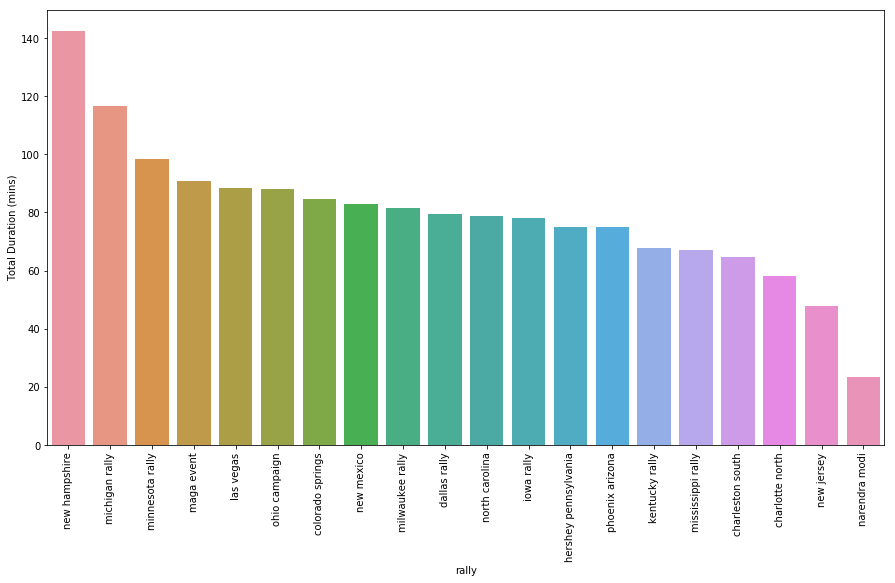

In [12]:
plt.figure(figsize=(15,8))
b = sns.barplot(x='rally', y='duration', data=total_duration_df.reset_index(drop=False).sort_values(by='duration', ascending=False));
c = plt.setp(b.get_xticklabels(), rotation=90)
plt.xlabel("rally")
plt.ylabel("Total Duration (mins)")

In [13]:
all_words = ' '.join(trump_df['text']).lower()

In [14]:
all_tokenized_words = nltk.tokenize.word_tokenize(all_words)
#al_words_dist = nltk.FreqDist(w.lower() for w in all_tokenized_words)

stopwords = nltk.corpus.stopwords.words('english')
all_words_except_stop_dist = nltk.FreqDist(w.lower() for w in all_tokenized_words if w not in stopwords and w.isalpha())   

In [15]:
all_words_except_stop_dist

FreqDist({'people': 1286, 'going': 1264, 'said': 1229, 'great': 1227, 'know': 1211, 'right': 988, 'want': 874, 'like': 828, 'one': 808, 'say': 712, ...})

(-0.5, 4999.5, 4999.5, -0.5)

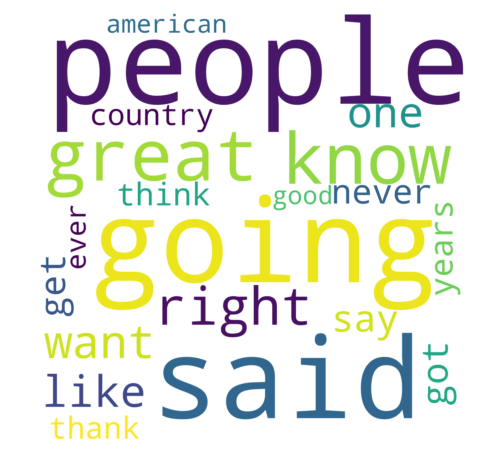

In [16]:
from wordcloud import WordCloud

plt.figure(figsize=(15,8))
wc = WordCloud(background_color="white", scale=10, width=500, height=500, max_words=20, relative_scaling=1, normalize_plurals=False).generate_from_frequencies(all_words_except_stop_dist)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [17]:
trump_df.reset_index(drop=True)

,name,text,time,rally,seconds_since_start,duration
0,Donald Trump,"I want to thank you very much. North Carolina,...",(02:45),charlotte north,165,0.0
1,Donald Trump,This is an incredible time for our nation. Our...,(03:39),charlotte north,219,54.0
2,Donald Trump,"By the way, look at this. Look back there, loo...",(04:19),charlotte north,259,40.0
3,Donald Trump,There’s never been a time where the Republican...,(04:59),charlotte north,299,40.0
4,Donald Trump,"Jobs are booming in our country, incomes are s...",(05:53),charlotte north,353,54.0
...,...,...,...,...,...,...
2125,Donald Trump,"We are one movement, one movement, think of th...",(01:32:04),maga event,5524,59.0
2126,Donald Trump,"We are so respected, you have no idea how our ...",(01:32:55),maga event,5575,51.0
2127,Donald Trump,"You’ve all heard it many times, right, we will...",(01:33:54),maga event,5634,59.0
2128,Donald Trump,"Look at her beautiful hat, it looks very good ...",(01:34:46),maga event,5686,52.0


In [18]:
trump_df = pd.read_csv("../data/trump-rallies/combined.csv")

In [19]:
def contains_word(s, w):
    return f' {w} ' in f' {s} '

In [20]:
healthcare = ["pharma", "pharmaceutical", "prescription", "health", "healthcare", "Medicaid", "Medicare", "insurance", "Obamacare", "Affordable Care Act", "ACA", "medical", "hospital", "premium", "copay","doctor", "care"]
foreign_pol = ["China", "Hong Kong", "Uighurs", "North Korea", "nuclear", "Russia", "Afghanistan", "Saudi Arabia", "Israeli-Palestinian", "Venezuela", "Maduro", "United Nations", "foreign", "foreign policy", "Israel", "Palestinian", "pro-Isreal", "anti-Israel", "Europe", "Yemen", "Gulf", "Middle East", "Iraq"]
defense = ["defense", "security", "war", "military", "alliance", "spending", "arms", "army", "defend", "ally", "allies", "arms sales", "invasion", "invade", "force", "mission", "national security", "troops", "soldiers", "weapon", "nuclear weapon", "combat", "service", "service members", "Al-Qaeda", "threat", "police", "courts", "prison", "Iraq", "Syria", "Afghanistan", "ISIS"]

trump_df['healthcare'] = False
trump_df['foreign_pol'] = False
trump_df['defense'] = False


for i, post in enumerate(trump_df['text']):
        for word in healthcare:
            if contains_word(post,word):
                trump_df.loc[i,'healthcare'] = True
                break

for i, post in enumerate(trump_df['text']):
        for word in foreign_pol:
            if contains_word(post,word):
                trump_df.loc[i,'foreign_pol'] = True
                break
                
                
for i, post in enumerate(trump_df['text']):
        for word in defense:
            if contains_word(post,word):
                trump_df.loc[i,'defense'] = True
                break
                
                
trump_df.head(20)



,name,text,time,rally,healthcare,foreign_pol,defense
0,Donald Trump,"I want to thank you very much. North Carolina,...",(02:45),charlotte north,False,False,False
1,Donald Trump,This is an incredible time for our nation. Our...,(03:39),charlotte north,False,False,False
2,Donald Trump,"By the way, look at this. Look back there, loo...",(04:19),charlotte north,False,False,False
3,Donald Trump,There’s never been a time where the Republican...,(04:59),charlotte north,False,False,False
4,Donald Trump,"Jobs are booming in our country, incomes are s...",(05:53),charlotte north,False,False,True
5,Donald Trump,"Two days ago, the Unites States signed a deal ...",(07:04),charlotte north,True,True,True
6,Donald Trump,"And all of the things that we’ve done, we’ve w...",(07:35),charlotte north,False,True,True
7,Donald Trump,"As we bring back our troops, we are committed ...",(08:27),charlotte north,False,True,False
8,Donald Trump,"By the way, I have to say this, you know you h...",(08:42),charlotte north,False,False,False
9,Donald Trump,"They don’t turn, they don’t turn. You notice, ...",(10:26),charlotte north,False,False,False


In [21]:
trump_df = trump_df[trump_df['name'].isin(['Donald Trump'])]

In [22]:
defense_df = trump_df[trump_df['defense']]
defense_df.head()

,name,text,time,rally,healthcare,foreign_pol,defense
4,Donald Trump,"Jobs are booming in our country, incomes are s...",(05:53),charlotte north,False,False,True
5,Donald Trump,"Two days ago, the Unites States signed a deal ...",(07:04),charlotte north,True,True,True
6,Donald Trump,"And all of the things that we’ve done, we’ve w...",(07:35),charlotte north,False,True,True
16,Donald Trump,"And together, we are in the midst of the great...",(16:44),charlotte north,False,False,True
81,Donald Trump,I recognized Israel’s true capital and opened ...,(59:16),charlotte north,False,False,True


In [23]:
health_df = trump_df[trump_df['healthcare']]

In [24]:
foreign_pol_df = trump_df[trump_df['foreign_pol']]

In [25]:
defense_words = ' '.join(defense_df['text']).lower()

In [26]:
defense_tokenized = nltk.tokenize.word_tokenize(defense_words)
#al_words_dist = nltk.FreqDist(w.lower() for w in all_tokenized_words)

defense_words_except_stop_dist = nltk.FreqDist(w.lower() for w in defense_tokenized if w not in stopwords and w.isalpha())   

In [27]:
defense_words_except_stop_dist

FreqDist({'want': 172, 'people': 160, 'know': 155, 'right': 150, 'great': 140, 'going': 129, 'american': 126, 'said': 121, 'one': 118, 'military': 103, ...})

(-0.5, 4999.5, 4999.5, -0.5)

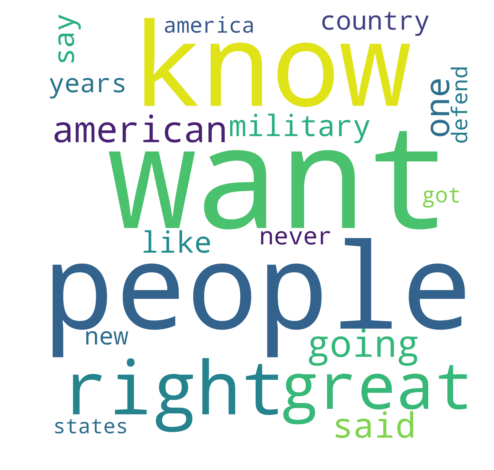

In [28]:
from wordcloud import WordCloud

plt.figure(figsize=(15,8))
wc = WordCloud(background_color="white", scale=10, width=500, height=500, max_words=20, relative_scaling=1, normalize_plurals=False).generate_from_frequencies(defense_words_except_stop_dist)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [29]:
health_words = ' '.join(health_df['text']).lower()

In [30]:
health_tokenized = nltk.tokenize.word_tokenize(health_words)
#al_words_dist = nltk.FreqDist(w.lower() for w in all_tokenized_words)

health_words_except_stop_dist = nltk.FreqDist(w.lower() for w in health_tokenized if w not in stopwords and w.isalpha())   

In [31]:
health_words_except_stop_dist

FreqDist({'going': 157, 'great': 124, 'know': 121, 'people': 120, 'care': 116, 'right': 116, 'take': 112, 'want': 111, 'said': 105, 'healthcare': 102, ...})

(-0.5, 4999.5, 4999.5, -0.5)

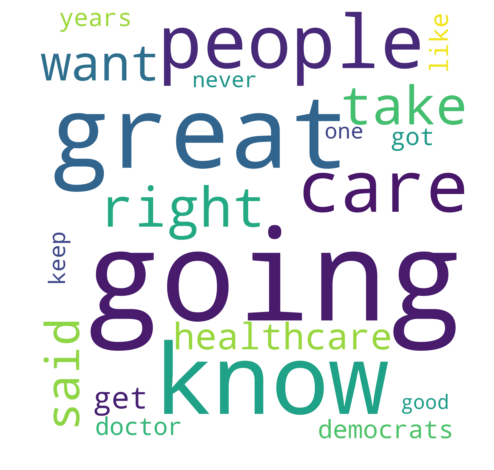

In [32]:
from wordcloud import WordCloud

plt.figure(figsize=(15,8))
wc = WordCloud(background_color="white", scale=10, width=500, height=500, max_words=20, relative_scaling=1, normalize_plurals=False).generate_from_frequencies(health_words_except_stop_dist)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [33]:
foreign_pol_words = ' '.join(foreign_pol_df['text']).lower()

In [34]:
foreign_pol_tokenized = nltk.tokenize.word_tokenize(foreign_pol_words)
#al_words_dist = nltk.FreqDist(w.lower() for w in all_tokenized_words)

foreign_pol_words_except_stop_dist = nltk.FreqDist(w.lower() for w in foreign_pol_tokenized if w not in stopwords and w.isalpha())   

In [35]:
foreign_pol_words_except_stop_dist

FreqDist({'china': 131, 'said': 97, 'know': 94, 'going': 86, 'people': 82, 'want': 75, 'years': 74, 'billion': 73, 'got': 71, 'great': 71, ...})

(-0.5, 4999.5, 4999.5, -0.5)

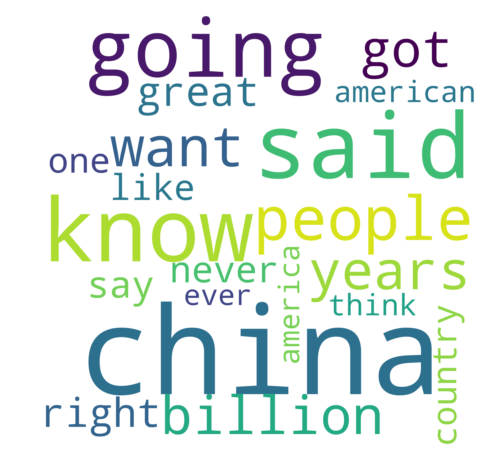

In [36]:
from wordcloud import WordCloud

plt.figure(figsize=(15,8))
wc = WordCloud(background_color="white", scale=10, width=500, height=500, max_words=20, relative_scaling=1, normalize_plurals=False).generate_from_frequencies(foreign_pol_words_except_stop_dist)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")